### This analysis is my own study to catch the concept of p-value hacking.

As it is given the *Standard Deviation* equasion has `n` as its denominator where `n` is number of observations.

\begin{equation*}
\sigma = \sqrt \frac{\sum |x - \bar{x}|^2} {n} 
\end{equation*}

Is it like the bigger the sample, the smaller the sigma?
Let's simulate several distributions to observe sigma values depending on sample size.

In [28]:
import numpy as np
import random
import statistics as stats
import matplotlib.pyplot as plt

In [57]:
random.seed(532)
mu, sigma = 0, 1

sample_a = np.random.normal(mu, sigma, 20)
sample_b = np.random.normal(mu, sigma, 50)
sample_c = np.random.normal(mu, sigma, 100)
sample_d = np.random.normal(mu, sigma, 200)
sample_e = np.random.normal(mu, sigma, 500)
sample_f = np.random.normal(mu, sigma, 1000*1)
sample_g = np.random.normal(mu, sigma, 1000*2)
sample_h = np.random.normal(mu, sigma, 1000*5)
sample_i = np.random.normal(mu, sigma, 1000*10)
sample_j = np.random.normal(mu, sigma, 1000*100)
sample_k = np.random.normal(mu, sigma, 1000*1000)
sample_l = np.random.normal(mu, sigma, 1000*50000)

In [64]:
samples = [sample_a, sample_b, sample_c, sample_d, sample_e, sample_f, sample_g, sample_h, sample_i, 
           sample_j, sample_k, sample_l]
x = []
y = []
for i in samples[:6]:
    print(len(i), i.std())
    x.append(len(i))
    y.append(i.std())

20 0.9085604476475714
50 0.8459715756909943
100 1.066525080660591
200 0.9263845726512726
500 1.0562400510430037
1000 0.9848828324229124


In [52]:
samples = [sample_a, sample_b, sample_c, sample_d, sample_e, sample_f, sample_g, sample_h, sample_i, 
           sample_j, sample_k, sample_l]
for i in samples:
    print('for sample size {one} the standard dev is {two}'.format(one = len(i), two = i.std()) )

for sample size 20 the standard dev is 0.8371918809387735
for sample size 50 the standard dev is 0.9940482781116224
for sample size 100 the standard dev is 0.9785403998656689
for sample size 200 the standard dev is 0.9964348716258009
for sample size 500 the standard dev is 1.0814050085355298
for sample size 1000 the standard dev is 0.9981698799404387
for sample size 2000 the standard dev is 0.9726889079364269
for sample size 5000 the standard dev is 1.0142336071893816
for sample size 10000 the standard dev is 1.0007461738942438
for sample size 100000 the standard dev is 1.0013121093732364
for sample size 1000000 the standard dev is 0.9993094049800144
for sample size 50000000 the standard dev is 0.9999435216213425


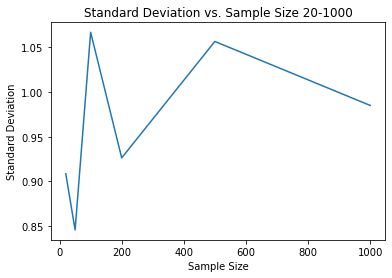

In [65]:
plt.plot(x, y)
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs. Sample Size 20-1000')
plt.show()

In [92]:
samples = [sample_a, sample_b, sample_c, sample_d, sample_e, sample_f, sample_g, sample_h, sample_i, 
           sample_j, sample_k, sample_l]
x = []
y = []
for i in samples:
    print(len(i), i.std())
    x.append(len(i))
    y.append(i.std())

20 0.9085604476475714
50 0.8459715756909943
100 1.066525080660591
200 0.9263845726512726
500 1.0562400510430037
1000 0.9848828324229124
2000 1.0064420113700505
5000 0.9921881062123711
10000 1.0014613591707737
100000 0.996968697643655
1000000 0.9998046117975231
50000000 0.9999937027828817


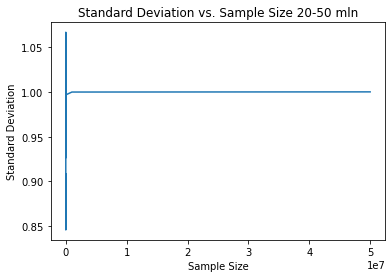

In [93]:
plt.plot(x, y)
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation')
plt.title(('Standard Deviation vs. Sample Size 20-50 mln'))
plt.show()

Standard deviation seems to be random. Lets check Standard Error statistics used for parameter significance tests. *Standard Error* equasion takes square root from Standard deviation as a counter and square root of sample size as a denominator

\begin{equation*}
SE = \frac{\sigma}{\sqrt {n}} 
\end{equation*}

Remembering what is the sigmas denominator... here we go: <br>
(notice these `n` in both denominators. What its impact on the error when sample's getting bigger?)

\begin{equation*}
SE = \frac{\sqrt \frac{\sum |x - \bar{x}|^2} {n}}{\sqrt {n}} 
\end{equation*}

In [77]:
import math 

In [79]:
samples = [sample_a, sample_b, sample_c, sample_d, sample_e, sample_f, sample_g, sample_h, sample_i, 
           sample_j, sample_k, sample_l]
x = []
y = []
for i in samples:
    print(len(i), i.std()/math.sqrt(len(i)))
    x.append(len(i))
    y.append(i.std()/math.sqrt(len(i)))

20 0.20316029226076085
50 0.11963844757243415
100 0.10665250806605911
200 0.06550528133083168
500 0.04723649109380008
1000 0.031144729788543334
2000 0.02250472752835049
5000 0.01403165876230812
10000 0.010014613591707737
100000 0.0031526918404456935
1000000 0.0009998046117975232
50000000 0.00014142046567632412


### Importatnt! Plot below shows how Standard Error rapidly decreases just because the numerical reasons (number of sample in equasion's denominator)

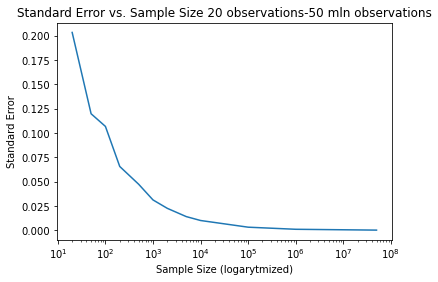

In [86]:
plt.plot(x, y)
plt.xlabel("Sample Size (logarytmized)")
plt.xscale('log')
plt.ylabel('Standard Error')
plt.title(('Standard Error vs. Sample Size 20 observations-50 mln observations'))
plt.show()

Good. The next step is `p-value` hacking analysis.

As we go to statistical testing, the `p-value` is understood as likelihood that the coeficient is **not significant**. Big  `p-value` indicates the a high likelihood of insignificance. So what must be its value to make the coefficient significant? The lowest possible. At least lower then 0.05 (for majority of tests, but sometimes even lower then 0.01). <br>
The `p-value` hacking phenomena is when `t-` or `z-` statistics expands `+/-1.96`. How can it happen? When we keep `SE` value close to zero having a numerous sample.


I'm using the random lm summary print from https://searchengineland.com/heres-how-i-used-python-to-build-a-regression-model-using-an-e-commerce-dataset-326493

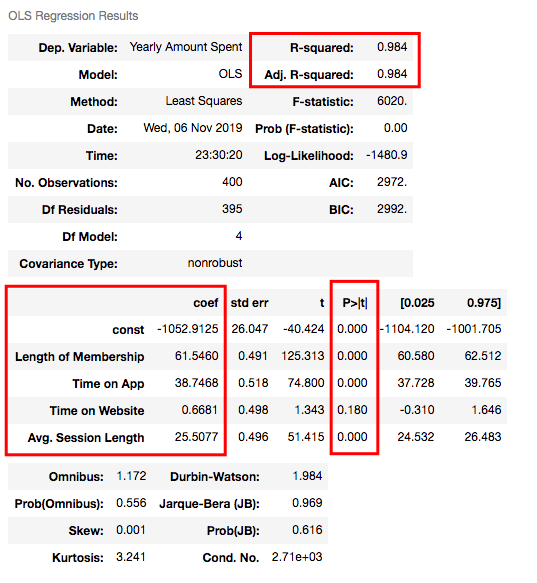

In [91]:
from IPython.display import Image
Image(filename='Downloads/image2-1.png',width=600, height=200)

Let's do our maths. <br> <br>
Dividing the `coef` by `std err` we receiving the `t` statistics. Everytime `t` value exceeds `+/-1.96` the `p-value` is close to zero. <br>
Knowing the `SE` nature already this can be risky to use OLS method on huge number of observations.

#### How to mitigate the risk? Ideas? <br>
Thinking of letting to many Xs in the model (as their coefficients seem statisticly siginificant) my biggest worry is the model overfitting. <br>
The first idea is splitting the data into `train` | `validation` | `test` samples, the second is `crossvalidation`. <BR>
